In [67]:
#先跟巴哈姆特動畫風請求
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36',
}

r = requests.get('https://ani.gamer.com.tw/', headers=headers)
if r.status_code == 200:
    print(f'請求成功：{r.status_code}')
else:
    print(f'請求失敗：{r.status_code}')



請求成功：200


In [68]:
#這邊要把本季所有的動畫列出來
for anime_item in anime_items:
    anime_name = anime_item.select_one('.anime-name > p').text.strip()
    print(anime_name)
    anime_watch_number_str = anime_item.select_one('.anime-watch-number > p').text.strip()
    print(anime_watch_number_str)
    anime_episode = anime_item.select_one('.anime-episode').text.strip()
    print(anime_episode)
    anime_href = anime_item.select_one('a.anime-card-block').get('href')

    # 因為巴哈母的觀看人數是含中文的，所以將觀看數字串轉換成數字
    anime_watch_number = int(re.sub('[^0-9]', '', anime_watch_number_str))

    # 若觀看數包含「萬」，則乘上 10000
    if '萬' in anime_watch_number_str:
        anime_watch_number *= 10000

    # 將每一筆資料存成一個字典
    anime_data = {
        '動畫名': anime_name,
        '觀看數': anime_watch_number,
        '已更新集數': anime_episode,
   
    }
   
    # 將每個字典加入到 data 列表中
    data.append(anime_data)


我家的英雄
27.3萬
第7集
轉生貴族的異世界冒險錄～不知自重的眾神使徒～
70.1萬
第7集
我內心的糟糕念頭
65.5萬
第7集
第二次被異世界召喚
40.2萬
第6集
鄰人似銀河
18.6萬
第6集
和山田談場 Lv999 的戀愛
77.7萬
第7集
MIX 第二季 ~第二個夏天，邁向晴空~
3.9萬
第7集
江戶前精靈
34.8萬
第6集
小鳥之翼 第二季
5.9萬
第19集
六道的惡女們
8.1萬
第6集
肌肉魔法使-MASHLE-
113.7萬
第6集
國王排名 勇氣的寶箱
14萬
第5集
勇者死了！
54.8萬
第6集
Opus.COLORs 色彩高校星
1.9萬
第6集
百合是我的工作！
13萬
第6集
Dr. STONE 新石紀 第三季
50.5萬
第6集
魔法使的新娘 第二季
28萬
第6集
無神世界的神明活動
70.9萬
第6集
為美好的世界獻上爆焰！
102萬
第6集
【我推的孩子】
233.9萬
第5集
魔術士歐菲 流浪之旅 聖域篇
1.3萬
第5集
絆之 Allele
7萬
第6集
在異世界獲得超強能力的我，在現實世界照樣無敵～等級提升改變人生命運～
113.6萬
第6集
屍體如山的死亡遊戲
57.4萬
第5集
帶著智慧型手機闖蕩異世界。2
38.7萬
第6集
熊熊勇闖異世界 PUNCH！
34.6萬
第6集
她去公爵家的理由
16.4萬
第5集
機戰少女 Alice Expansion
5.2萬
第6集
我與機器子
96.1萬
第22集
鬼滅之刃 刀匠村篇
179.5萬
第5集
機動戰士鋼彈 水星的魔女 Season 2
46.5萬
第17集
輝夜姬想讓人告白－永不結束的初吻－
63.6萬
第4集
劇場版 歌之☆王子殿下♪ 真愛 ST☆RISH TOURS
7368



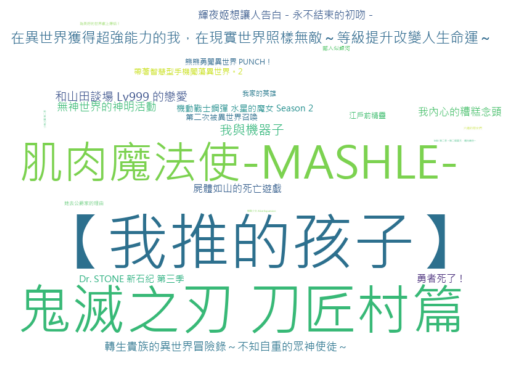

In [69]:
#這邊製作文字雲(我們的目標是觀看次數愈多，字愈大)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 讀取 JSON 格式的文字
with open('data.json', 'r', encoding='utf-8') as f:
    json_data = f.read()

# 將 JSON 格式的文字轉換成 Python 中的物件
data = json.loads(json_data)

# 取出所有的動畫名稱和觀看數
names = [item['動畫名'] for item in data]
views = [item['觀看數'] for item in data]

# 將動畫名稱和觀看數轉換成字典
word_freq = {names[i]: views[i] for i in range(len(names))}

# 使用 WordCloud 產生文字雲
wordcloud = WordCloud(background_color='white', width=800, height=600, font_path='msjh.ttc', max_words=100, max_font_size=100).generate_from_frequencies(word_freq)

# 顯示文字雲
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
